In [1]:
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP

import matplotlib.pyplot as plt

from utils.useful_tool import convert_polar_df

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


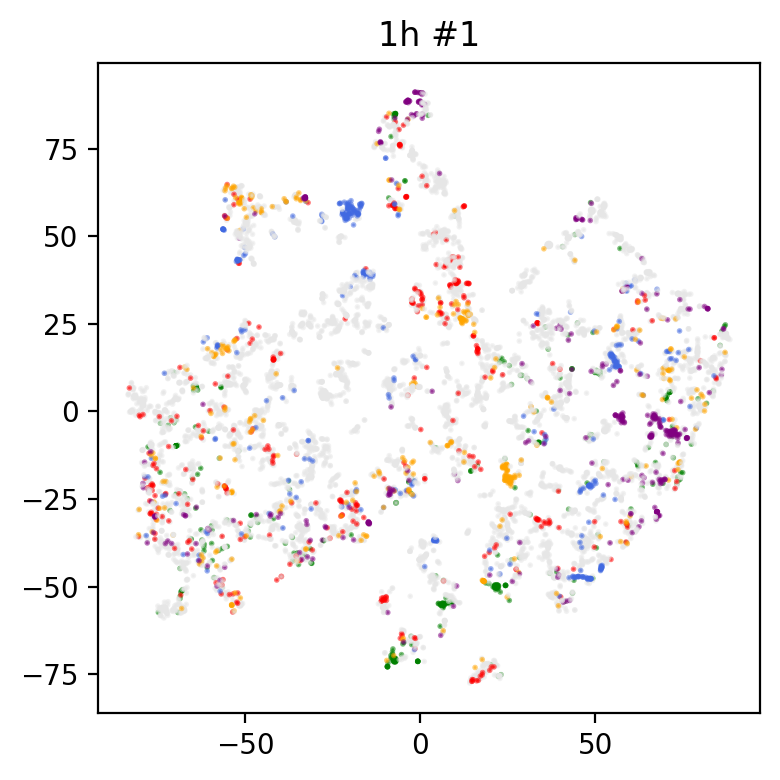

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


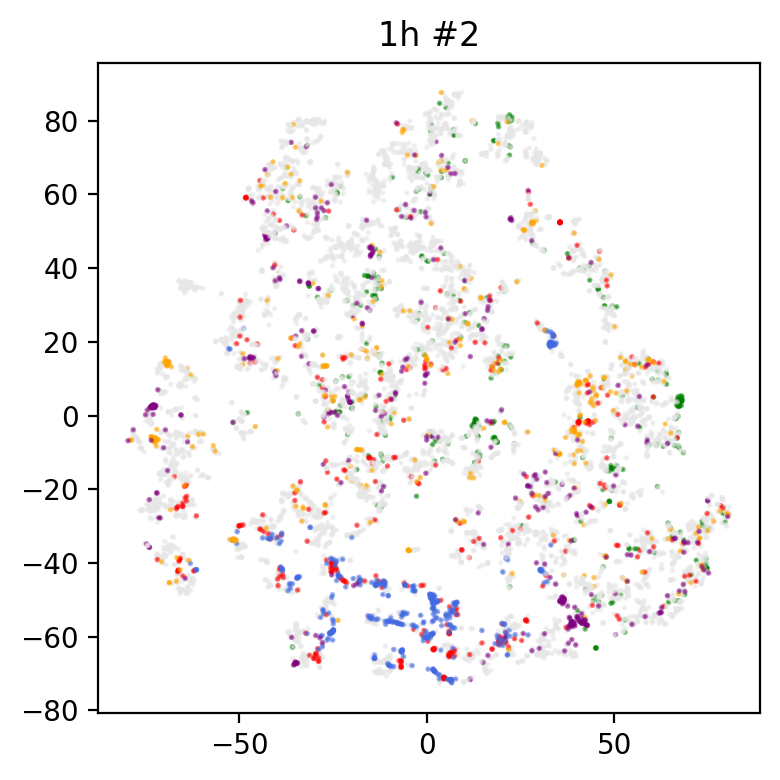

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


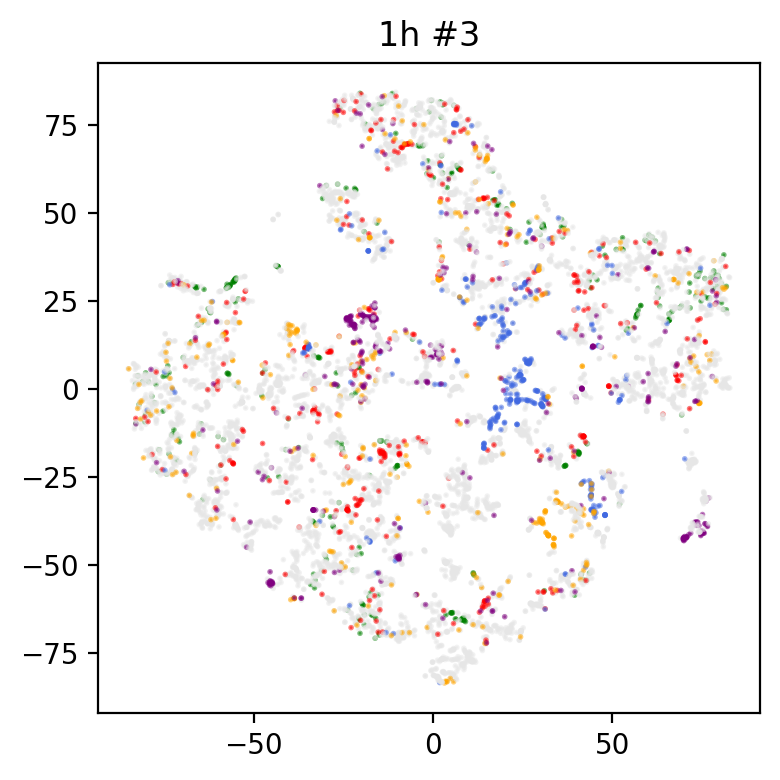

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


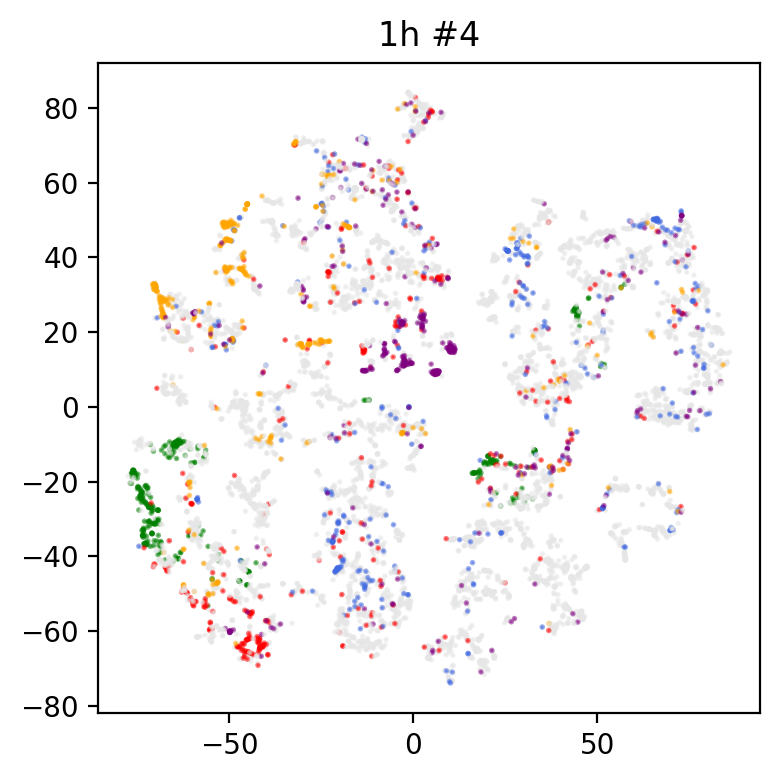

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


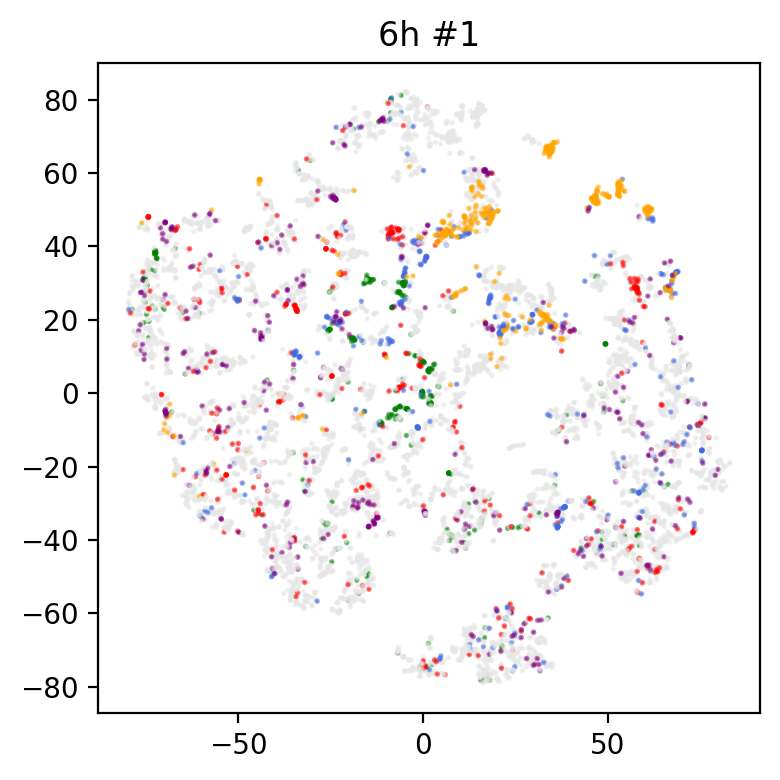

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


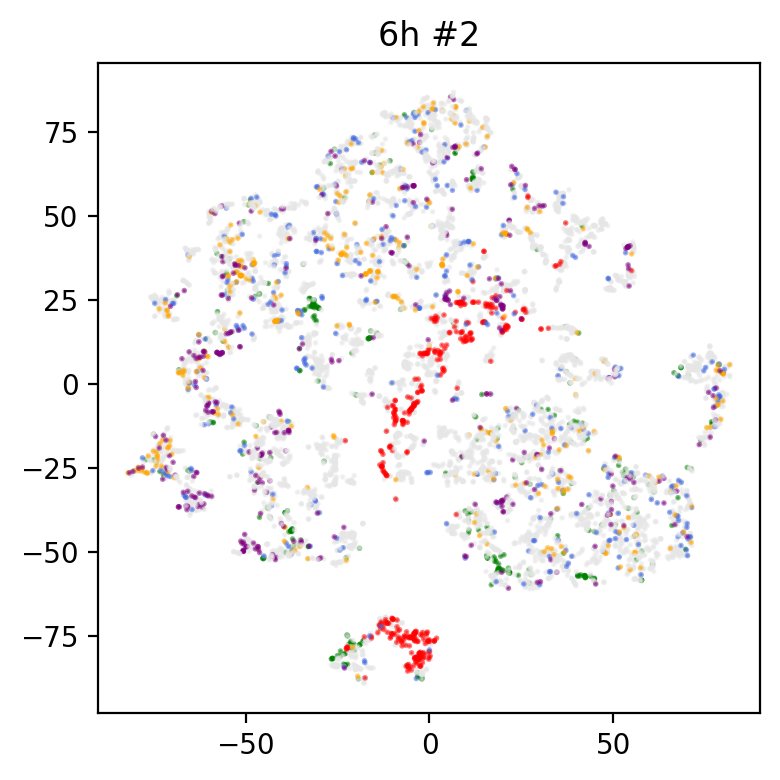

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


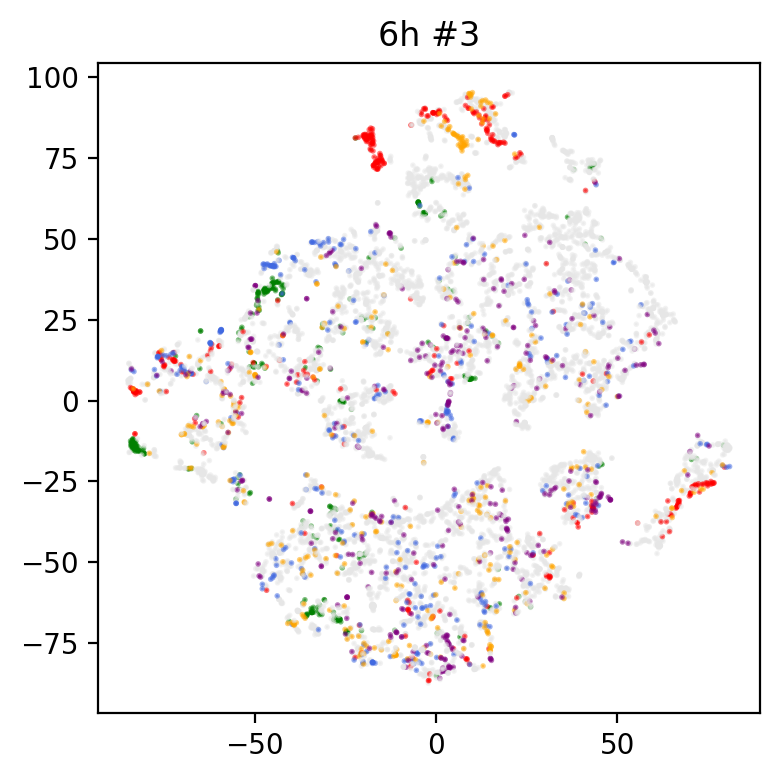

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


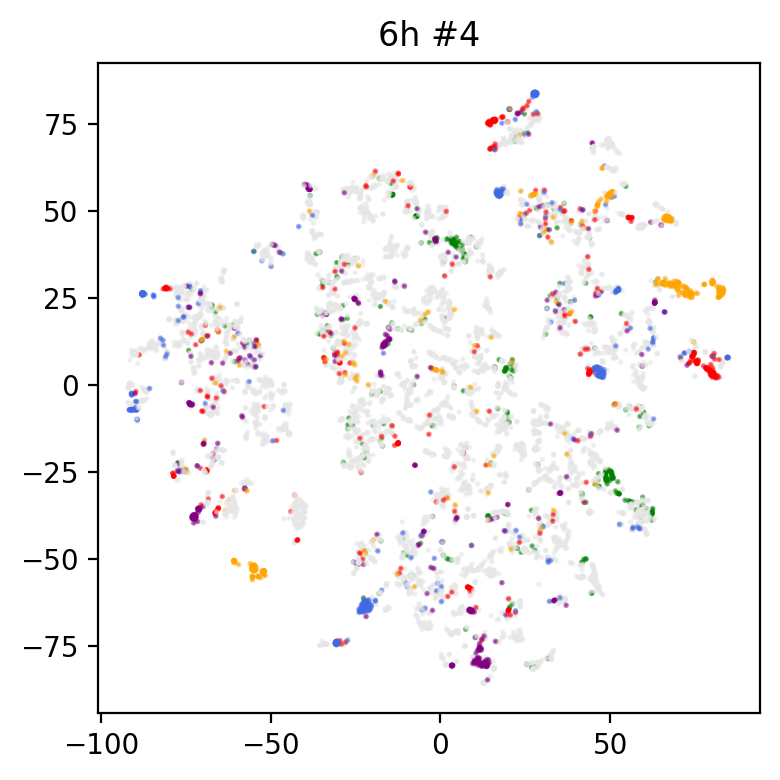

In [2]:
intervals = ['1h', '6h']
count = 4

for interval_index, interval in enumerate(intervals):
    for number in range(1, 5):
        fig, ax = plt.subplots(figsize=(4, 4), dpi=200, tight_layout=True)
        filepath = './resources/extinction/dlc/60min_x1_%s_EXT_%d.csv' % (interval, number)
        
        df = pd.read_csv(filepath, header=[1, 2], index_col=[0])
        
        body_parts = df.columns.get_level_values(0).unique(0).to_list()
        drop_columns = [(body, 'likelihood') for body in body_parts]
        df.drop(drop_columns, axis=1, inplace=True)
        
        xy_df = pd.read_csv('./resources/extinction/dlc/60min_x1_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])
        
        polar_df = convert_polar_df(df, xy_df)
        polar_df = polar_df.apply(lambda x: (x-x.mean()) / x.std(), axis=0)

        data = polar_df.to_numpy()
        pca = PCA()
        pca.fit(data)
        feature = pca.transform(data)

        pca_list = feature[:, :6]
    
        tsne = TSNE(n_components=2, metric='cosine')
        x_embedded = tsne.fit_transform(pca_list)
        
        x, y = zip(*x_embedded)
        size = len(polar_df)
        
        colors = ['0.9'] * size
        colors[0:360] = ['green'] * 360
        colors[5040:5400] = ['red'] * 360
        colors[5400:5760] = ['royalblue'] * 360
        colors[5760:6120] = ['orange'] * 360
        colors[6120:6480] = ['purple'] * 360

        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.5)
        ax.set_title('%s #%d' % (interval, number))
        plt.show()

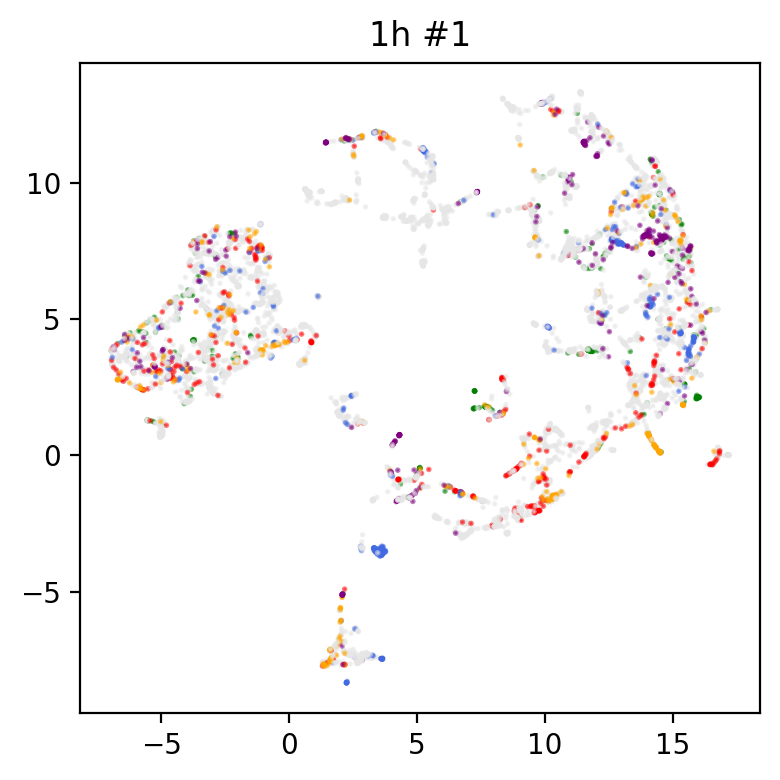

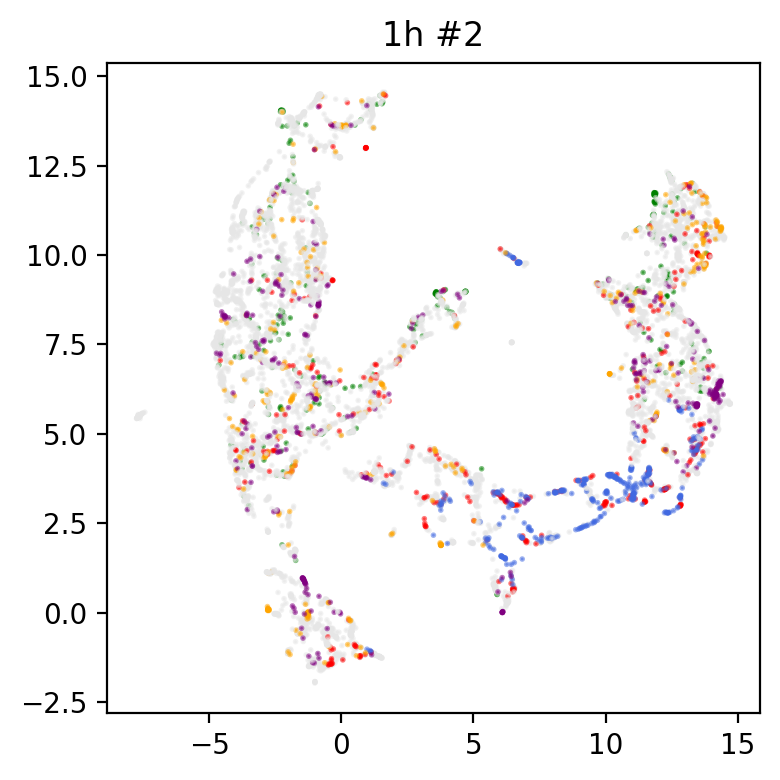

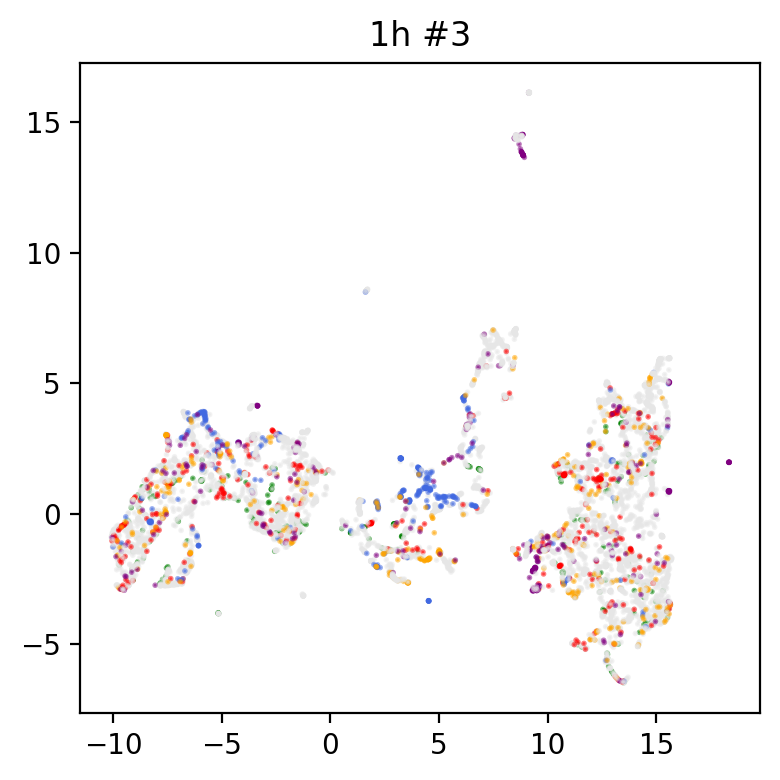

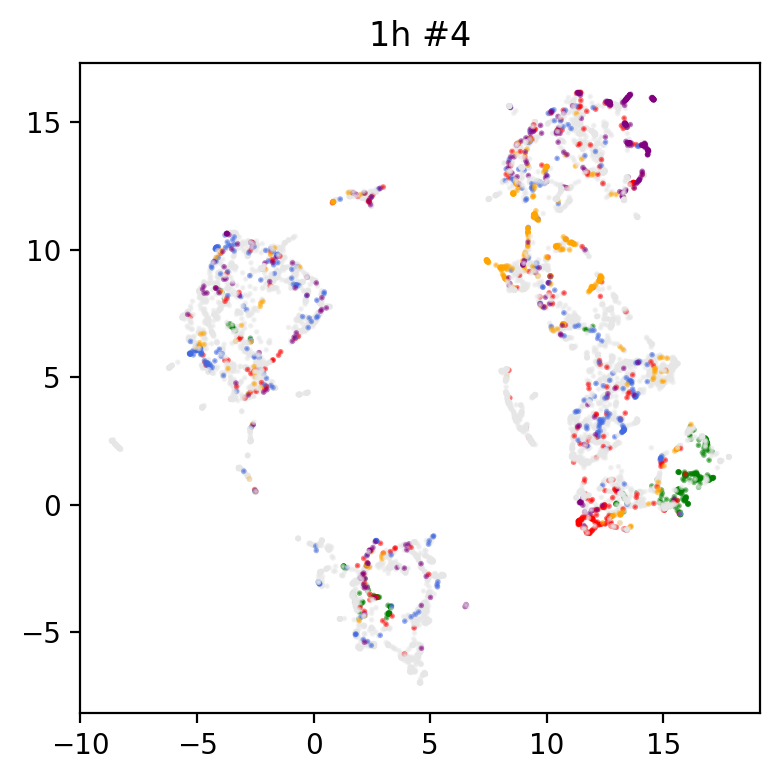

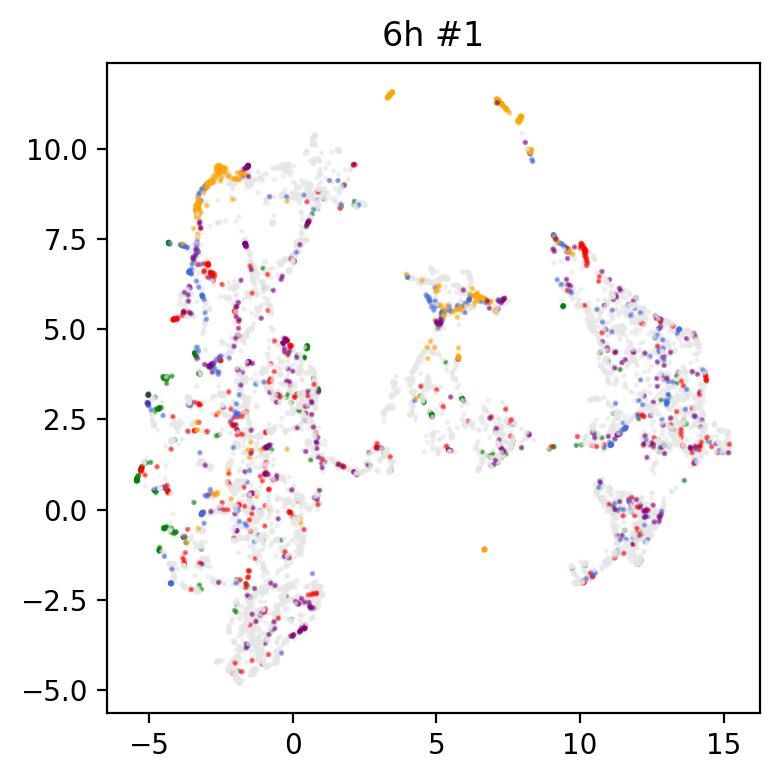

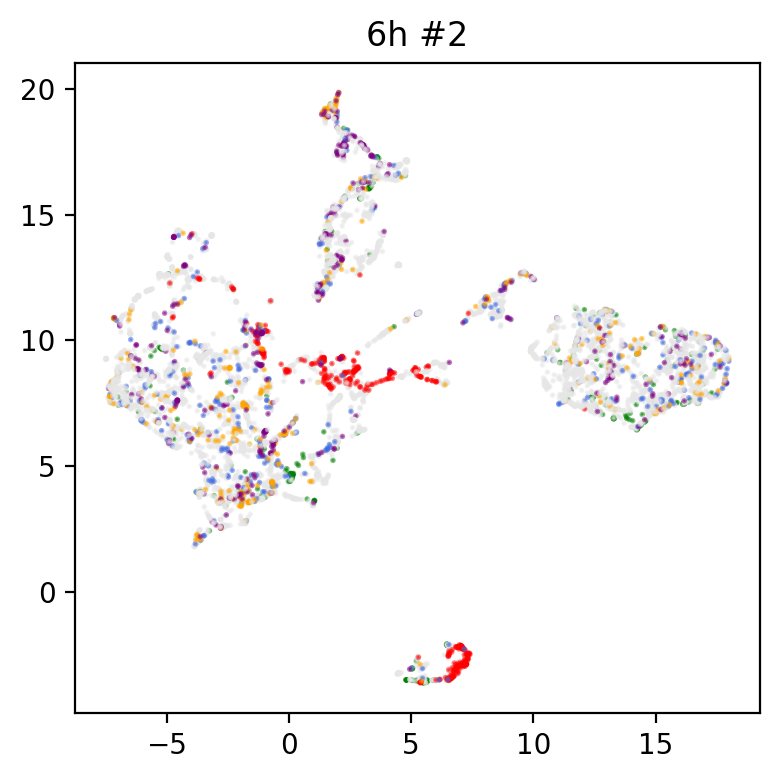

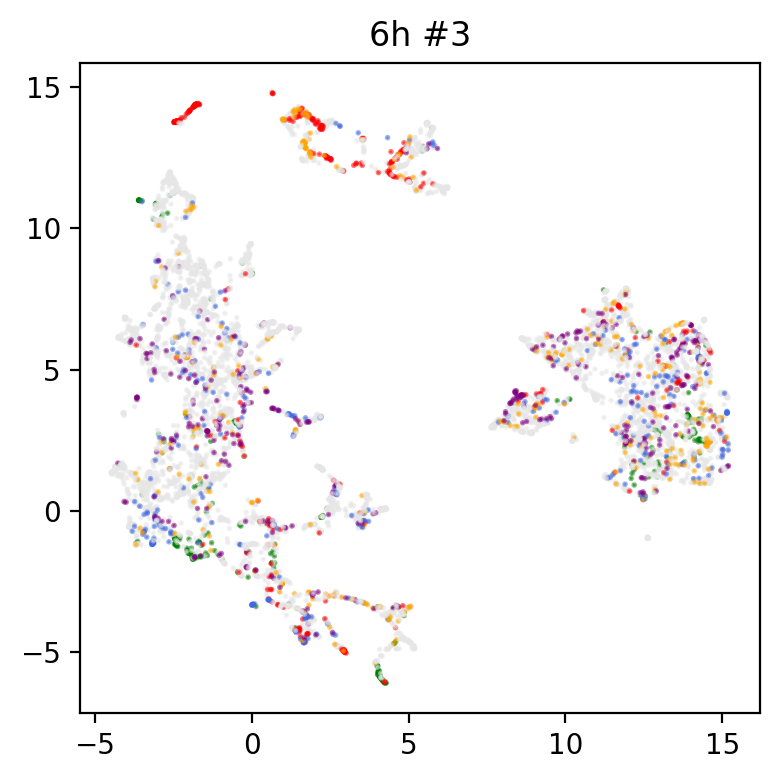

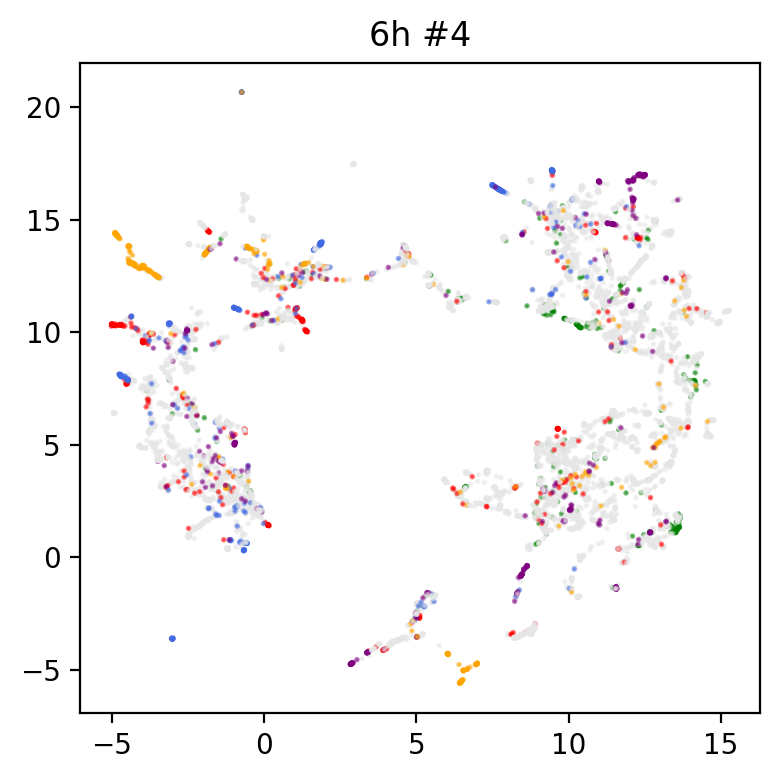

In [3]:
intervals = ['1h', '6h']
count = 4

for interval_index, interval in enumerate(intervals):
    for number in range(1, 5):
        fig, ax = plt.subplots(figsize=(4, 4), dpi=200, tight_layout=True)
        filepath = './resources/extinction/dlc/60min_x1_%s_EXT_%d.csv' % (interval, number)
        
        df = pd.read_csv(filepath, header=[1, 2], index_col=[0])
        
        body_parts = df.columns.get_level_values(0).unique(0).to_list()
        drop_columns = [(body, 'likelihood') for body in body_parts]
        df.drop(drop_columns, axis=1, inplace=True)
        
        xy_df = pd.read_csv('./resources/extinction/dlc/60min_x1_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])
        
        polar_df = convert_polar_df(df, xy_df)
        polar_df = polar_df.apply(lambda x: (x-x.mean()) / x.std(), axis=0)

        data = polar_df.to_numpy()
        pca = PCA()
        pca.fit(data)
        feature = pca.transform(data)

        pca_list = feature[:, :6]
    
        umap_model = UMAP(n_components=2, metric='cosine')
        x_embedded = umap_model.fit_transform(pca_list)
        
        x, y = zip(*x_embedded)
        size = len(polar_df)
        
        colors = ['0.9'] * size
        colors[0:360] = ['green'] * 360
        colors[5040:5400] = ['red'] * 360
        colors[5400:5760] = ['royalblue'] * 360
        colors[5760:6120] = ['orange'] * 360
        colors[6120:6480] = ['purple'] * 360

        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.5)
        ax.set_title('%s #%d' % (interval, number))
        plt.show()

[0.24226695 0.13922381 0.11098846 0.08808611 0.05939539 0.04454907
 0.03993752 0.03815319 0.03463579 0.03010137 0.0267591  0.0233324
 0.02064236 0.01846286 0.01450371 0.0112133  0.0103708  0.01000678
 0.00859482 0.00801462 0.00570509 0.00504879 0.0039726  0.00366716
 0.00236795]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


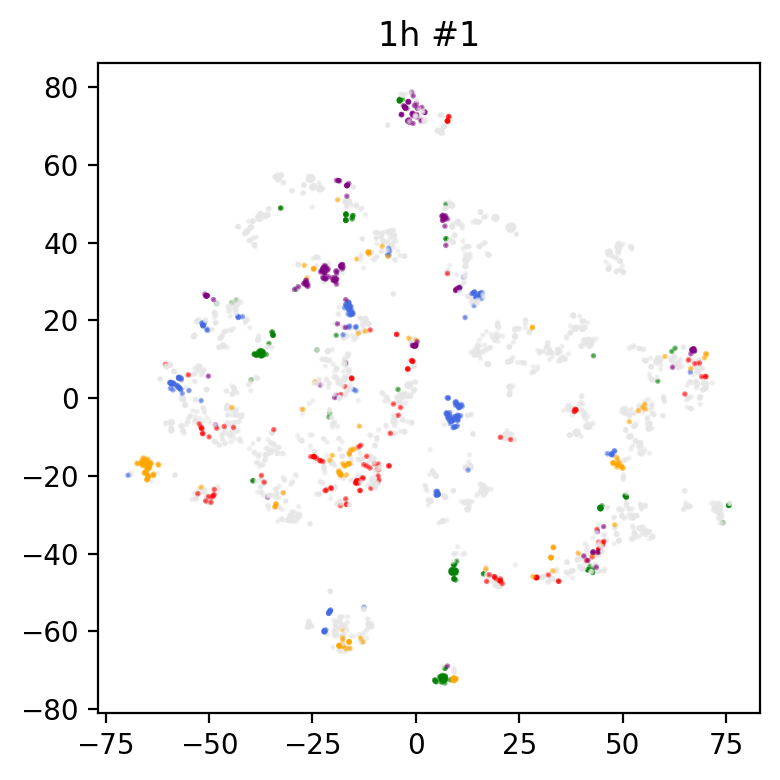

[0.32835987 0.15066185 0.07909301 0.07627471 0.04959404 0.04224443
 0.03783001 0.03439877 0.0331157  0.02591666 0.02379701 0.02093659
 0.016841   0.01478875 0.01165107 0.01015397 0.00917549 0.00794682
 0.00652535 0.00573197 0.00473457 0.00376423 0.00247457 0.0020492
 0.00194036]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


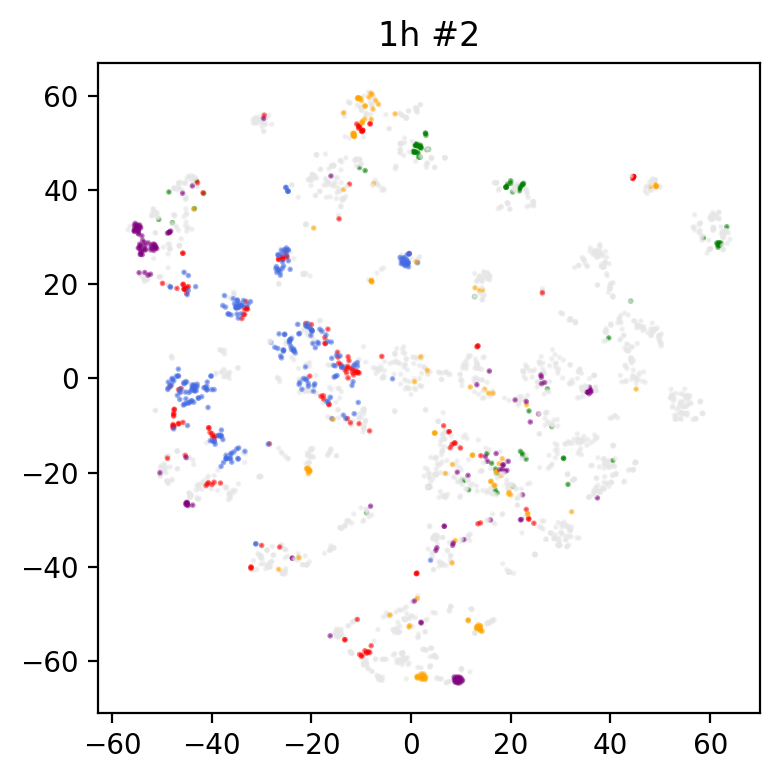

[0.26418285 0.17660418 0.09397006 0.07261983 0.06524456 0.04472679
 0.04337628 0.03773983 0.03253775 0.02709394 0.02626273 0.02196045
 0.01674868 0.01546457 0.01078619 0.00819371 0.00724239 0.00692827
 0.00606291 0.00570462 0.00499888 0.00384886 0.00349604 0.00269672
 0.00150892]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


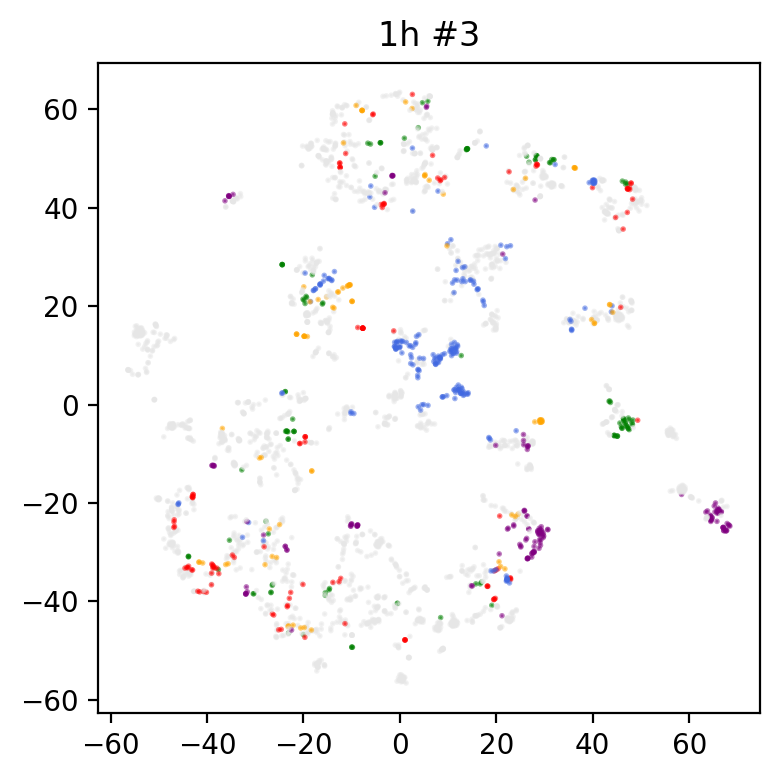

[0.3015521  0.1614997  0.15019057 0.08028698 0.05663841 0.04771826
 0.04039118 0.03735818 0.02514437 0.01918162 0.01625453 0.01274278
 0.00948419 0.00763762 0.00613323 0.00487551 0.00414796 0.00405609
 0.0033591  0.0029979  0.00277498 0.00227429 0.00126064 0.00122824
 0.00081156]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


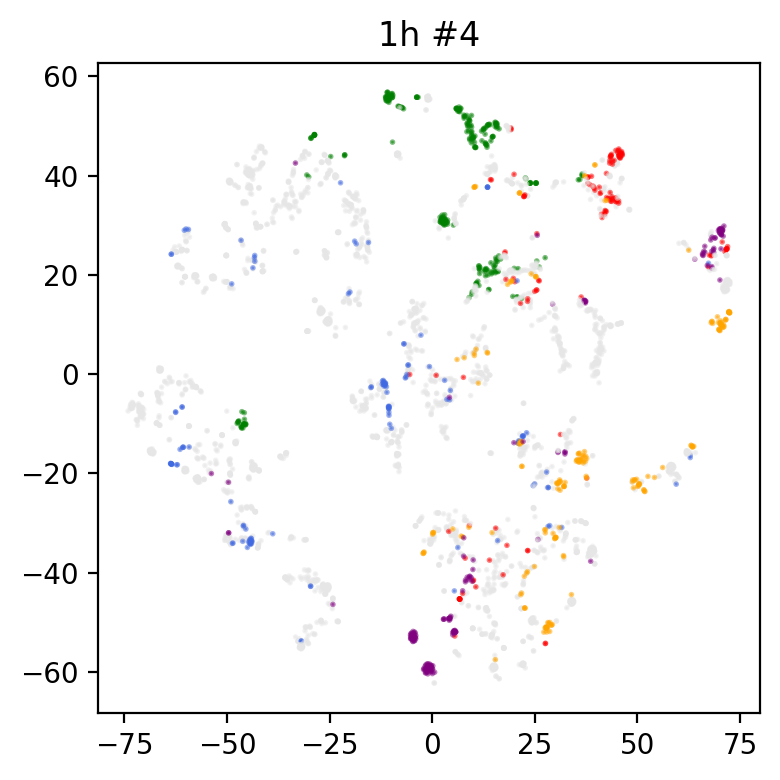

[0.31542606 0.20416353 0.08820273 0.05856545 0.05368926 0.04534608
 0.0372567  0.03082329 0.03042427 0.0248717  0.02121492 0.01690143
 0.01378767 0.01092651 0.00959992 0.00851906 0.00723855 0.00573664
 0.00440166 0.00393248 0.00283146 0.00235295 0.0015516  0.00118079
 0.00105531]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


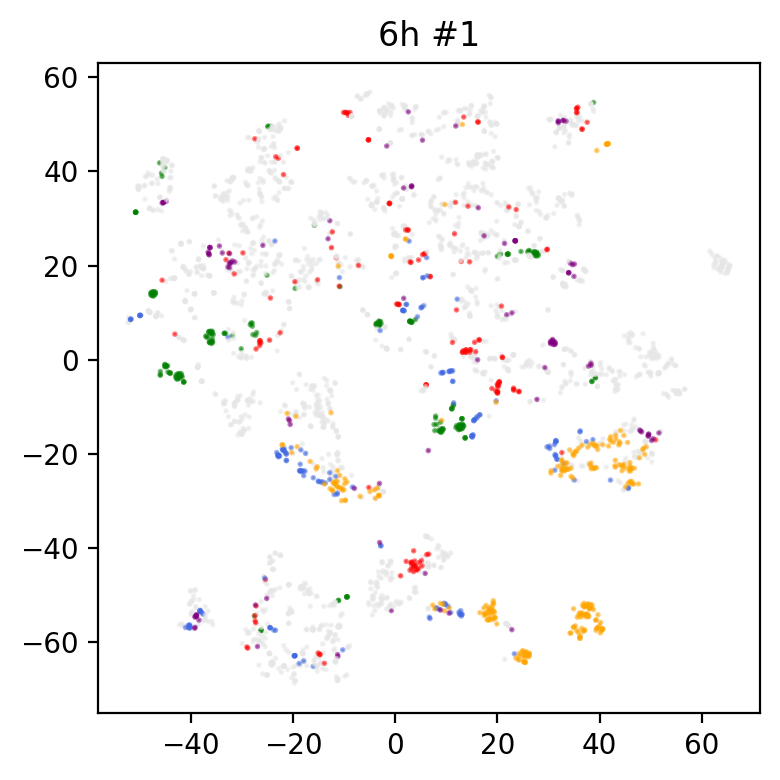

[0.1875281  0.14812017 0.1211053  0.10825625 0.05504226 0.04674178
 0.04218139 0.04015401 0.03330409 0.03233879 0.02866207 0.0272431
 0.02266149 0.01871102 0.01527306 0.01349379 0.01290159 0.00940483
 0.00833439 0.00726911 0.00679288 0.00561188 0.00417882 0.00262619
 0.00206365]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


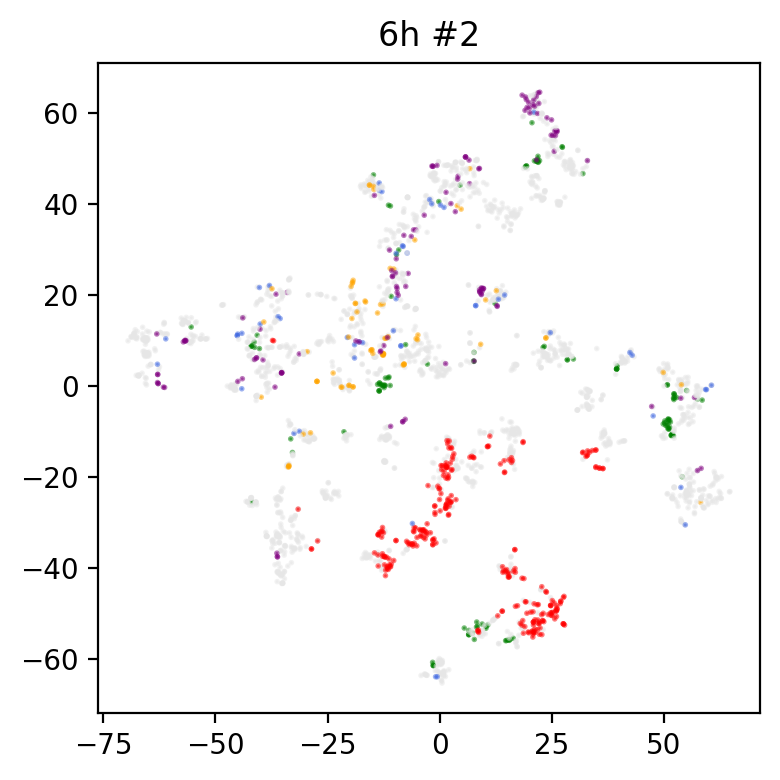

[0.28371947 0.19186792 0.10798202 0.06944241 0.0555514  0.0447536
 0.03798417 0.02997846 0.02907439 0.02389319 0.02112188 0.01771798
 0.01205943 0.01114872 0.01027538 0.00904602 0.00835267 0.00764162
 0.00660934 0.0058018  0.00483601 0.00457766 0.00314401 0.002141
 0.00127945]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


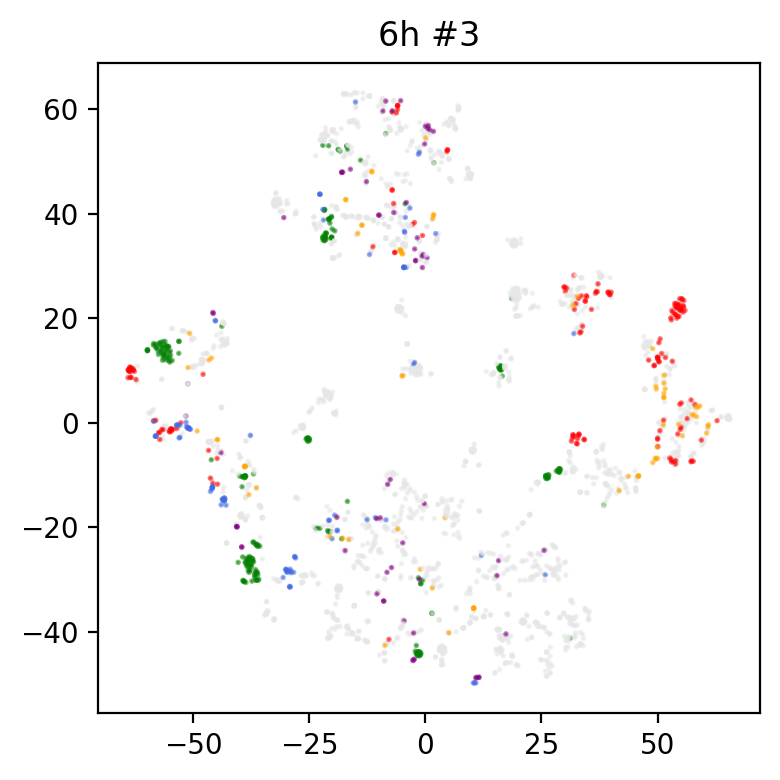

[0.32094841 0.21321039 0.13999131 0.06828694 0.04812857 0.04049888
 0.03742417 0.02143792 0.02095702 0.01551644 0.01405765 0.01017169
 0.0092683  0.00750249 0.00570614 0.00533414 0.00447525 0.00407437
 0.00338313 0.00248281 0.00211923 0.0018805  0.0015691  0.00101593
 0.00055922]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


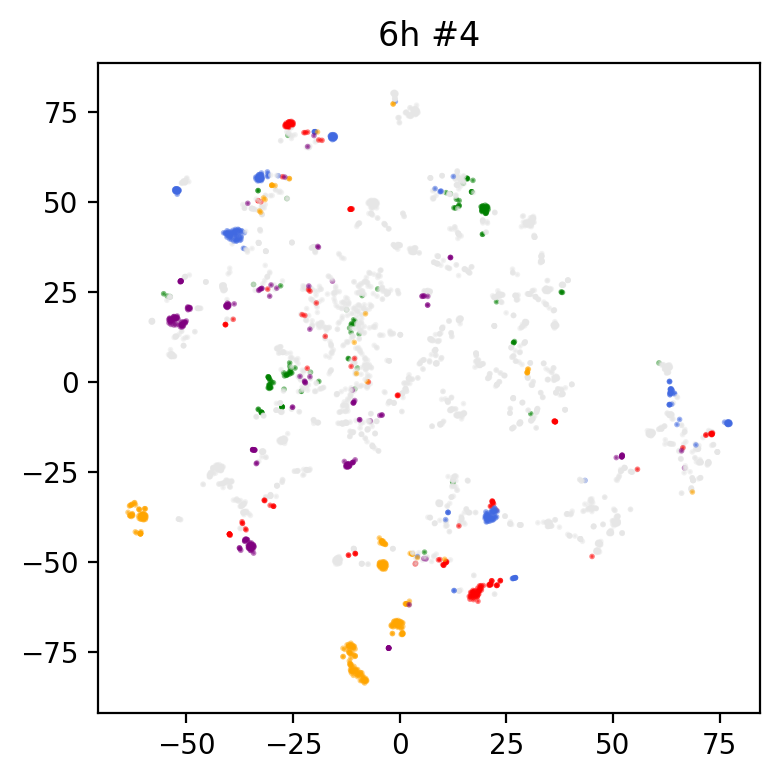

In [4]:
intervals = ['1h', '6h']
count = 4

for interval_index, interval in enumerate(intervals):
    for number in range(1, 5):
        fig, ax = plt.subplots(figsize=(4, 4), dpi=200, tight_layout=True)
        filepath = './resources/extinction/dlc/60min_x1_%s_EXT_%d.csv' % (interval, number)
        
        df = pd.read_csv(filepath, header=[1, 2], index_col=[0])
        
        bodyparts = list(set([body for (body, value) in df.columns]))
        drop_columns = [(body, 'likelihood') for body in bodyparts]
        df.drop(drop_columns, axis=1, inplace=True)
        
        xy_df = pd.read_csv('./resources/extinction/dlc/60min_x1_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])

        polar_df = convert_polar_df(df, xy_df)

        freezing_index = xy_df[xy_df['FZ'] == 1].index
        freezing_df = polar_df.iloc[freezing_index, :]
        freezing_df = freezing_df.apply(lambda x: (x - x.mean()) / x.std(), axis=0)
        
        data = freezing_df.to_numpy()
        pca = PCA()
        pca.fit(data)
        feature = pca.transform(data)
        print(pca.explained_variance_ratio_)

        pca_list = feature[:, :9]

        tsne = TSNE(n_components=2, metric='cosine')
        x_embedded = tsne.fit_transform(pca_list)
        x_embedded
        
        x, y = zip(*x_embedded)
        
        size = len(df)
        
        index_series = pd.Series(freezing_df.index)
        freezing_size = len(index_series[index_series <= 360])
        sleeping_size = len(index_series[index_series > 360])
        colors = ['green'] * freezing_size + ['0.9'] * sleeping_size
        colors = ['red' if df_index >= 5040 and df_index < 5400 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['royalblue' if df_index >= 5400 and df_index < 5760 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['orange' if df_index >= 5760 and df_index < 6120 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['purple' if df_index >= 6120 and df_index < 6480 else colors[i] for i, df_index in enumerate(index_series)]

        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.5)
        
        ax.set_title('%s #%d' % (interval, number))
        plt.show()

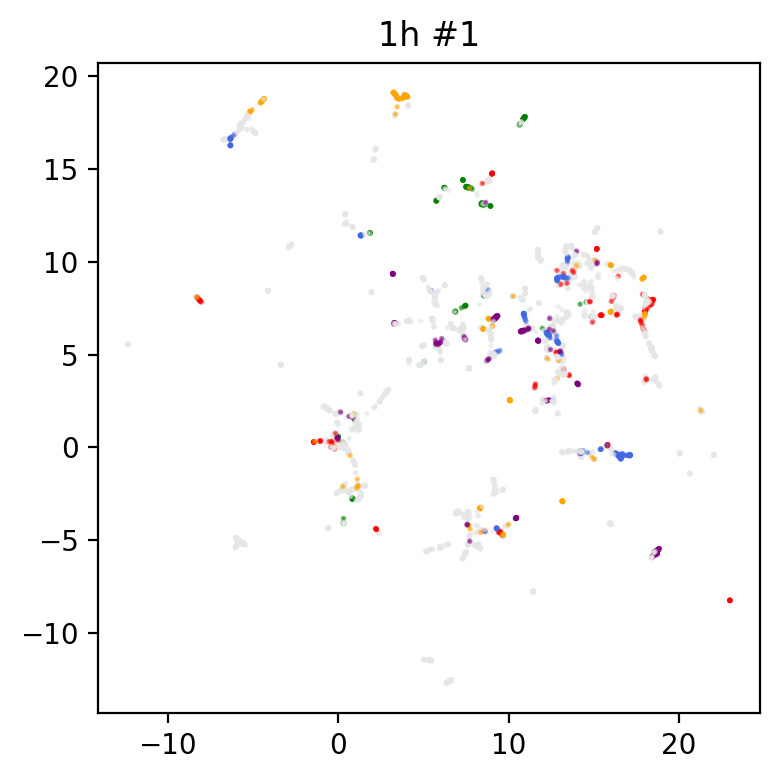

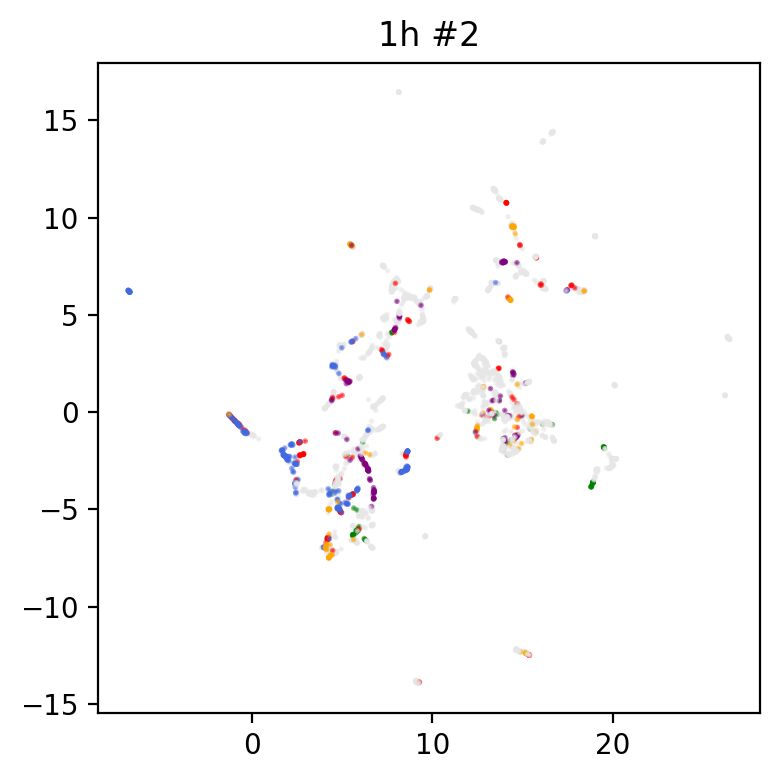

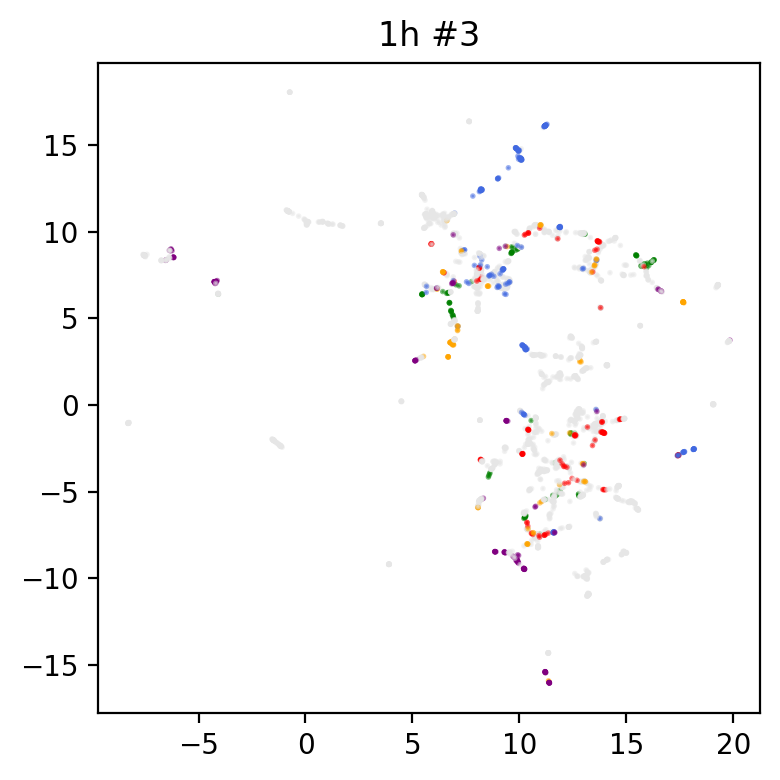

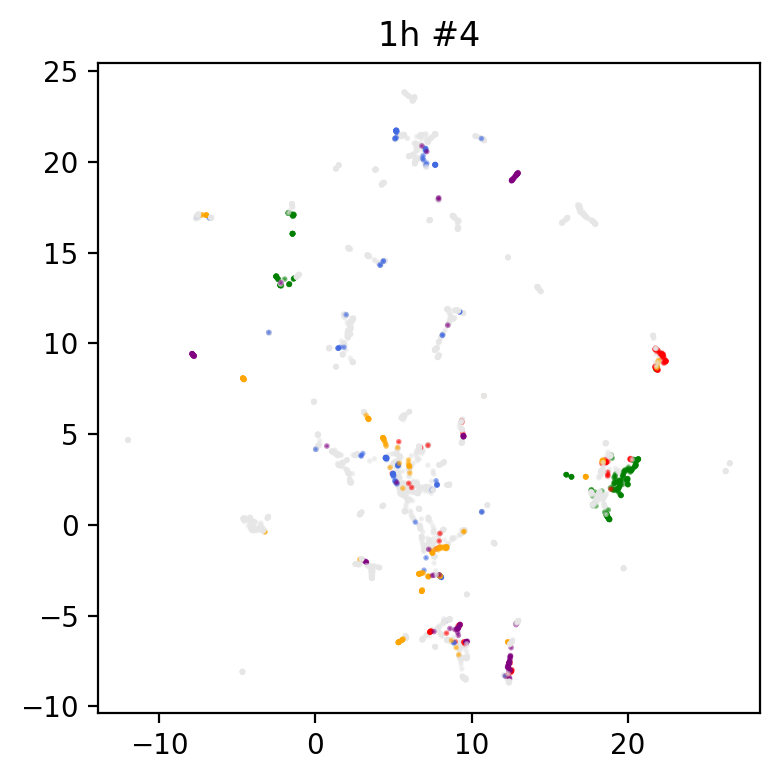

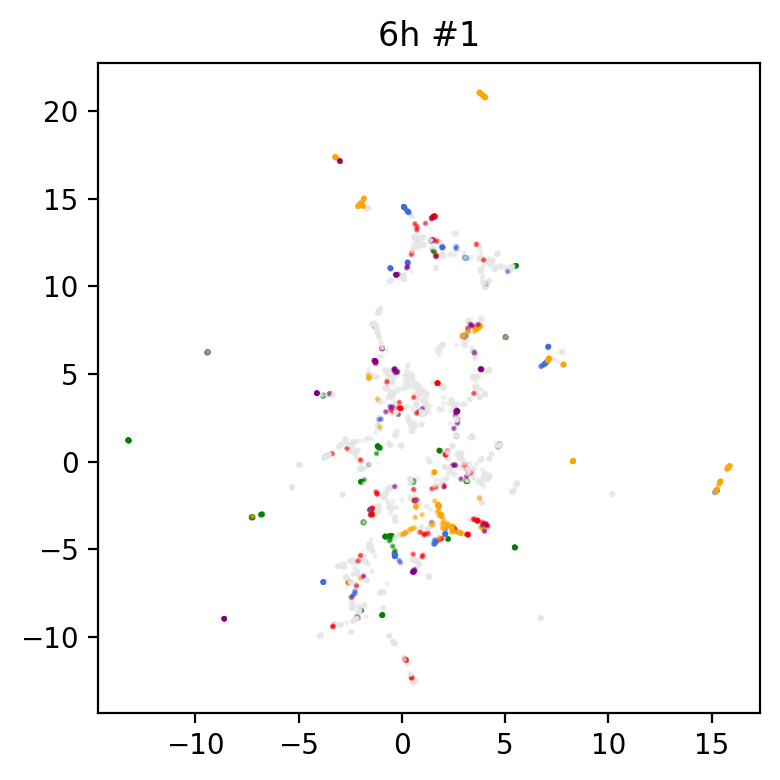

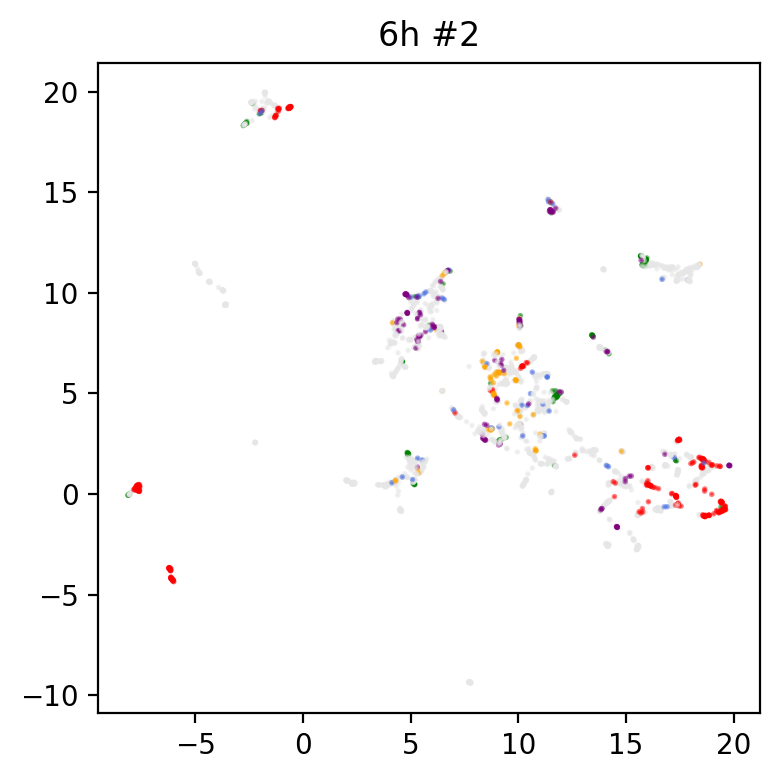

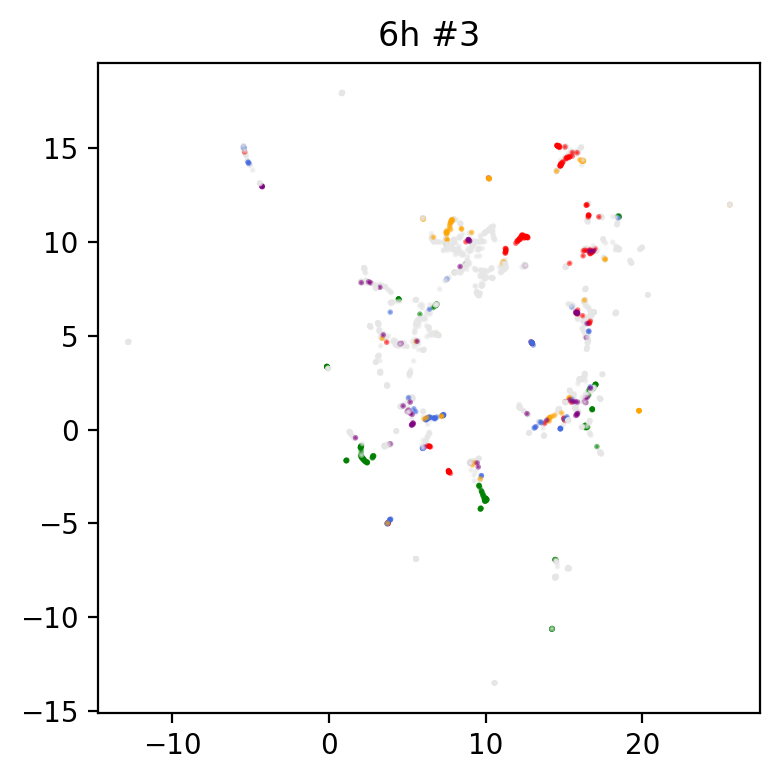

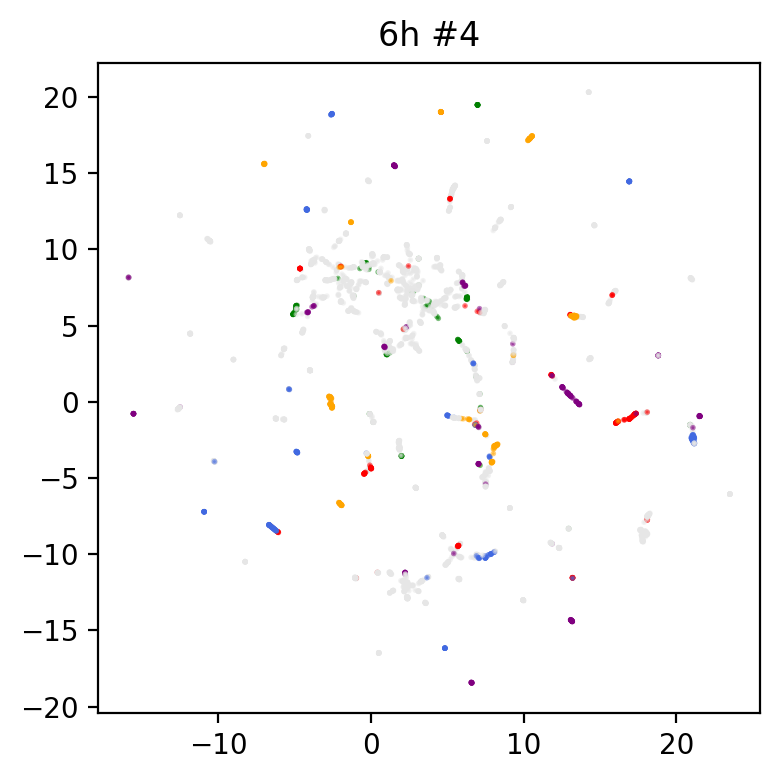

In [16]:
intervals = ['1h', '6h']
count = 4

for interval_index, interval in enumerate(intervals):
    for number in range(1, 5):
        fig, ax = plt.subplots(figsize=(4, 4), dpi=200, tight_layout=True)
        filepath = './resources/extinction/dlc/60min_x1_%s_EXT_%d.csv' % (interval, number)
        
        df = pd.read_csv(filepath, header=[1, 2], index_col=[0])
        
        bodyparts = list(set([body for (body, value) in df.columns]))
        drop_columns = [(body, 'likelihood') for body in bodyparts]
        df.drop(drop_columns, axis=1, inplace=True)
        
        xy_df = pd.read_csv('./resources/extinction/dlc/60min_x1_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])

        polar_df = convert_polar_df(df, xy_df)

        freezing_index = xy_df[xy_df['FZ'] == 1].index
        freezing_df = polar_df.iloc[freezing_index, :]
        #freezing_df = freezing_df.apply(lambda x: (x - x.mean()) / x.std(), axis=0)
        
        data = freezing_df.to_numpy()
        #pca = PCA()
        #pca.fit(data)
        #feature = pca.transform(data)
        #pca_list = feature[:, :9]

        umap = UMAP(n_components=2, metric='cosine')
        x_embedded = umap.fit_transform(data)
        x_embedded
        
        x, y = zip(*x_embedded)
        
        size = len(df)
        
        index_series = pd.Series(freezing_df.index)
        freezing_size = len(index_series[index_series <= 360])
        sleeping_size = len(index_series[index_series > 360])
        colors = ['green'] * freezing_size + ['0.9'] * sleeping_size
        colors = ['red' if df_index >= 5040 and df_index < 5400 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['royalblue' if df_index >= 5400 and df_index < 5760 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['orange' if df_index >= 5760 and df_index < 6120 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['purple' if df_index >= 6120 and df_index < 6480 else colors[i] for i, df_index in enumerate(index_series)]

        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.5)
        
        ax.set_title('%s #%d' % (interval, number))
        plt.show()

In [5]:
def append_ranged_color_name(colors, color_name, start, end = None):
    step = end - start
    #print('color_name: %s, start: %d, end: %d' % (color_name, start, end))
    #print('prev color size: %d' % len(colors))
    colors[start:end] = [color_name] * step
    #print('post color size: %d' % len(colors))

def ranged_color_time(index_series: pd.Series, start: int, step: int = 360):
    return [len(index_series[index_series <= start]), len(index_series[index_series < start + step])]

intervals = ['1h', '6h']
count = 4

polar_dfs = None
colors = []

for interval_index, interval in enumerate(intervals):
    for number in range(1, 5):
        filepath = './resources/extinction/dlc/60min_x1_%s_EXT_%d.csv' % (interval, number)
        
        df = pd.read_csv(filepath, header=[1, 2], index_col=[0])
        
        bodyparts = list(set([body for (body, value) in df.columns]))
        drop_columns = [(body, 'likelihood') for body in bodyparts]
        df.drop(drop_columns, axis=1, inplace=True)
        
        xy_df = pd.read_csv('./resources/extinction/dlc/60min_x1_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])

        polar_df = convert_polar_df(df, xy_df)

        freezing_index = xy_df[xy_df['FZ'] == 1].index
        freezing_df = polar_df.iloc[freezing_index, :]
        freezing_df

        if polar_dfs is None:
            polar_dfs = freezing_df.copy(deep=True)
        else:
            polar_dfs = pd.concat([polar_dfs, freezing_df.copy(deep=True)])

        index_series = pd.Series(freezing_df.index)

        pre_colors = ['0.9'] * len(index_series)
        append_ranged_color_name(pre_colors, 'green', 0, 360)

        red_start, red_end = ranged_color_time(index_series, 5040)
        append_ranged_color_name(pre_colors, 'red', red_start, red_end)

        blue_start, blue_end = ranged_color_time(index_series, 5400)
        append_ranged_color_name(pre_colors, 'royalblue', blue_start, blue_end)

        orange_start, orange_end = ranged_color_time(index_series, 5760)
        append_ranged_color_name(pre_colors, 'orange', orange_start, orange_end)

        purple_start, purple_end = ranged_color_time(index_series, 6120)
        append_ranged_color_name(pre_colors, 'purple', purple_start, purple_end)

        colors.extend(pre_colors)

In [6]:
polar_dfs

bodyparts       nose              leftear             rightear            \
coords      distance     theta   distance     theta   distance     theta   
0          38.027833  3.058890  26.261146  2.462682  20.432002  2.982464   
1          37.868212 -3.119129  26.216024  2.503691  19.533619  3.081039   
2          37.284513 -3.071652  25.639235  2.531201  19.045426  3.121656   
3          36.776926 -3.079281  25.352021  2.489034  18.510827  3.069290   
4          36.912067 -3.089004  26.630480  2.628582  18.836845  3.092978   
...              ...       ...        ...       ...        ...       ...   
7189       30.926027  0.901776  16.652698  0.276071  14.377675  1.156290   
7193       33.699575  0.879242  18.017232  0.349236  15.248745  1.154063   
7196       35.417165  0.506906  20.545712  0.023374  17.872723  0.790053   
7197       36.039100  0.511158  20.797484  0.025922  17.356236  0.829540   
7198       35.325127  0.509807  21.639419  0.087254  19.584956  0.792236   

bodyparts       neck                body1            ...     body4      tail1  \
coords      distance     theta   distance     theta  ...     theta   distance   
0          19.157568  2.568994  10.678829  2.227986  ... -0.717618  27.025406   
1          18.540954  2.624533  10.124878  2.338862  ... -0.712914  26.881494   
2          18.272819  2.671345   9.898354  2.397281  ... -0.709053  27.002846   
3          18.230302  2.609956  10.068776  2.301151  ... -0.673187  26.214525   
4          18.481246  2.646482  10.386533  2.342401  ... -0.661926  26.165021   
...              ...       ...        ...       ...  ...       ...        ...   
7189       11.269650  0.632573   4.996812  0.292866  ... -2.747440  31.462489   
7193       12.909990  0.677491   5.807161  0.173900  ... -2.694690  31.494661   
7196       14.649940  0.397142   6.273039  0.221799  ... -2.895529  34.972559   
7197       14.927871  0.406411   6.738277  0.204611  ... -2.880333  33.811187   
7198       15.993294  0.457875   7.584273  0.326816  ... -2.873068  33.571054   

bodyparts                tail2                tail3                tail4  \
coords        theta   distance     theta   distance     theta   distance   
0         -1.022436  46.517406 -1.244857  67.235654 -1.485153  79.172161   
1         -1.017081  46.259231 -1.238941  67.706698 -1.483272  79.114042   
2         -1.023009  46.146430 -1.243090  67.786987 -1.484114  78.833532   
3         -1.004739  45.384295 -1.235205  66.919168 -1.483445  77.890631   
4         -0.999356  45.206500 -1.232961  66.860445 -1.480254  77.777287   
...             ...        ...       ...        ...       ...        ...   
7189      -2.901688  52.513240 -3.021526  72.532389 -3.122514  84.837231   
7193      -2.853457  52.712633 -2.949708  72.952278 -3.054291  86.247101   
7196      -2.982045  55.995914 -3.053727  77.963823 -3.130105  91.639873   
7197      -2.972410  55.131056 -3.048095  77.091387 -3.127236  90.748283   
7198      -2.960115  54.724091 -3.034921  75.405317 -3.115568  89.874961   

bodyparts                         NaN  
coords        theta distance_by_frane  
0         -1.695521               0.0  
1         -1.688843               0.1  
2         -1.681403               0.1  
3         -1.681443               0.0  
4         -1.680556               0.0  
...             ...               ...  
7189       3.004202               0.0  
7193       3.079253               0.0  
7196       3.023262               0.0  
7197       3.021529               0.0  
7198       3.046402               0.1  

[22313 rows x 25 columns]

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


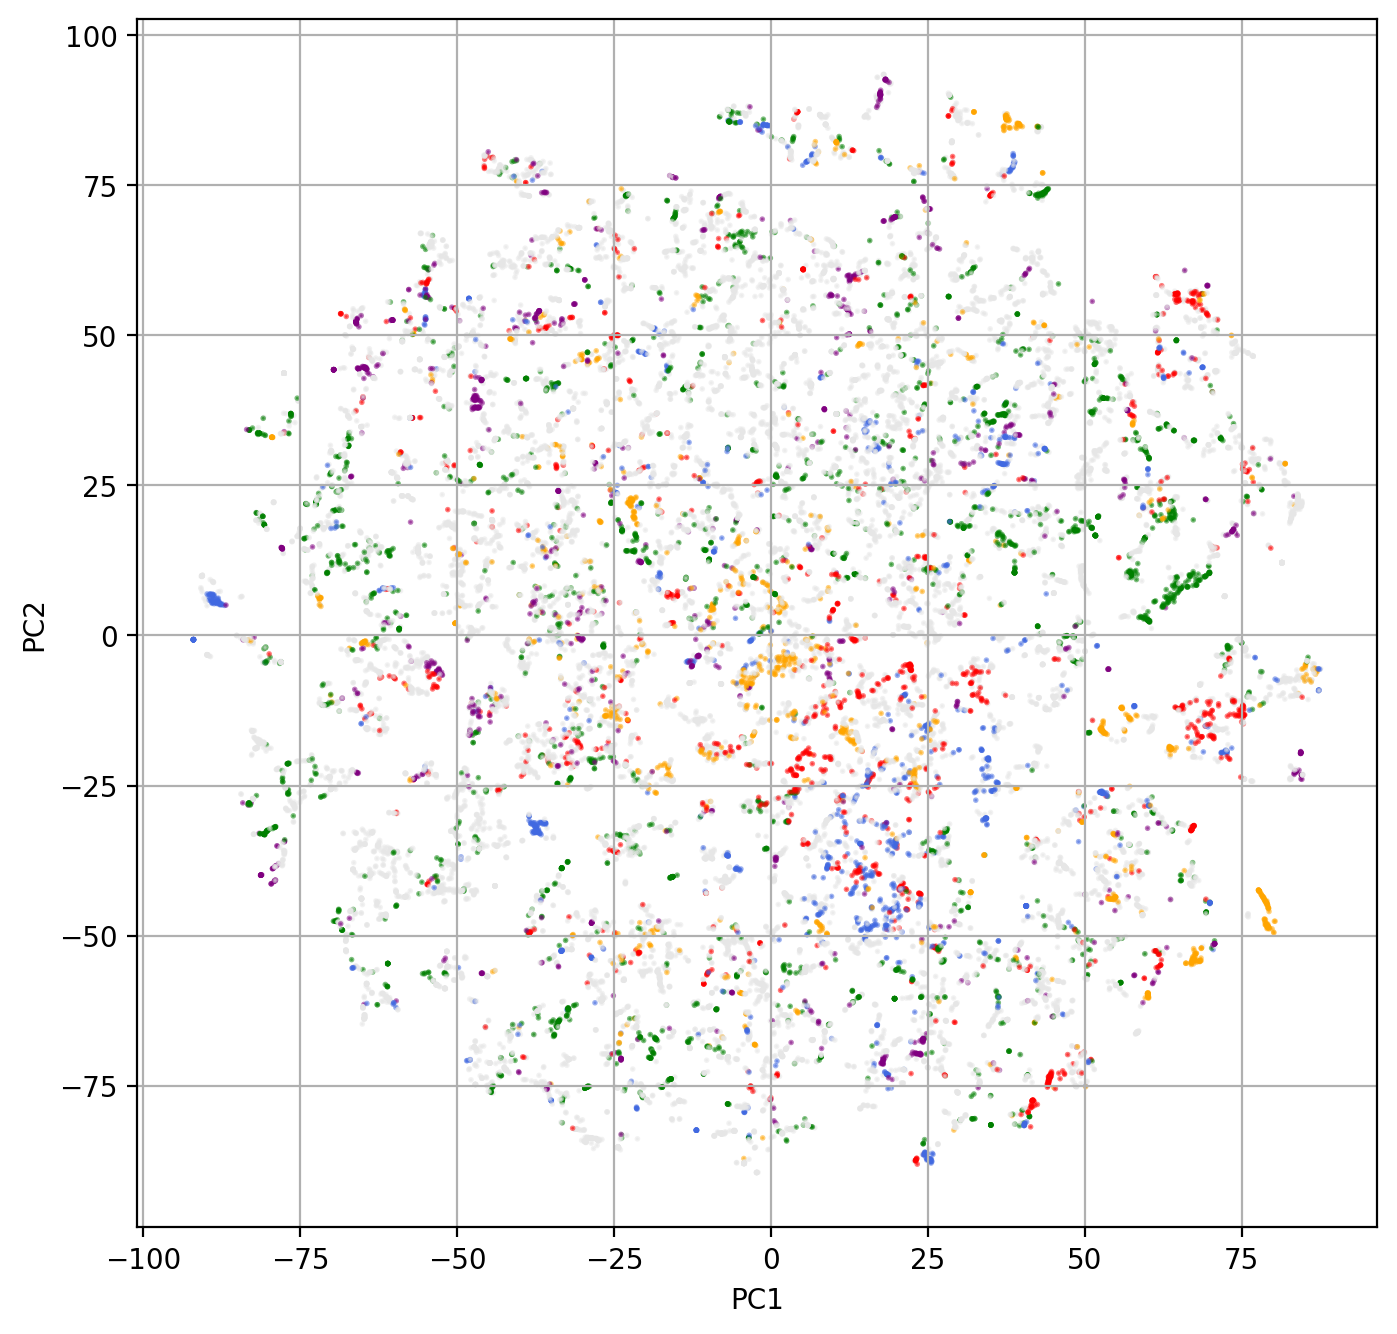

In [7]:
polar_dfs = polar_dfs.apply(lambda x: (x-x.mean()) / x.std(), axis=0)
data = polar_dfs.to_numpy()
pca = PCA()
pca.fit(data)
feature = pca.transform(data)

pca_list = feature[:, :6]
tsne = TSNE(n_components=2, metric='cosine')
x_embedded = tsne.fit_transform(pca_list)
x_embedded

x, y = zip(*x_embedded)

plt.figure(figsize=(8, 8), dpi=200)
plt.scatter(x, y, alpha=0.5, s=1.0, c=colors)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.xlim(-10.0, 10.0)
# plt.ylim(-10.0, 10.0)
plt.show()

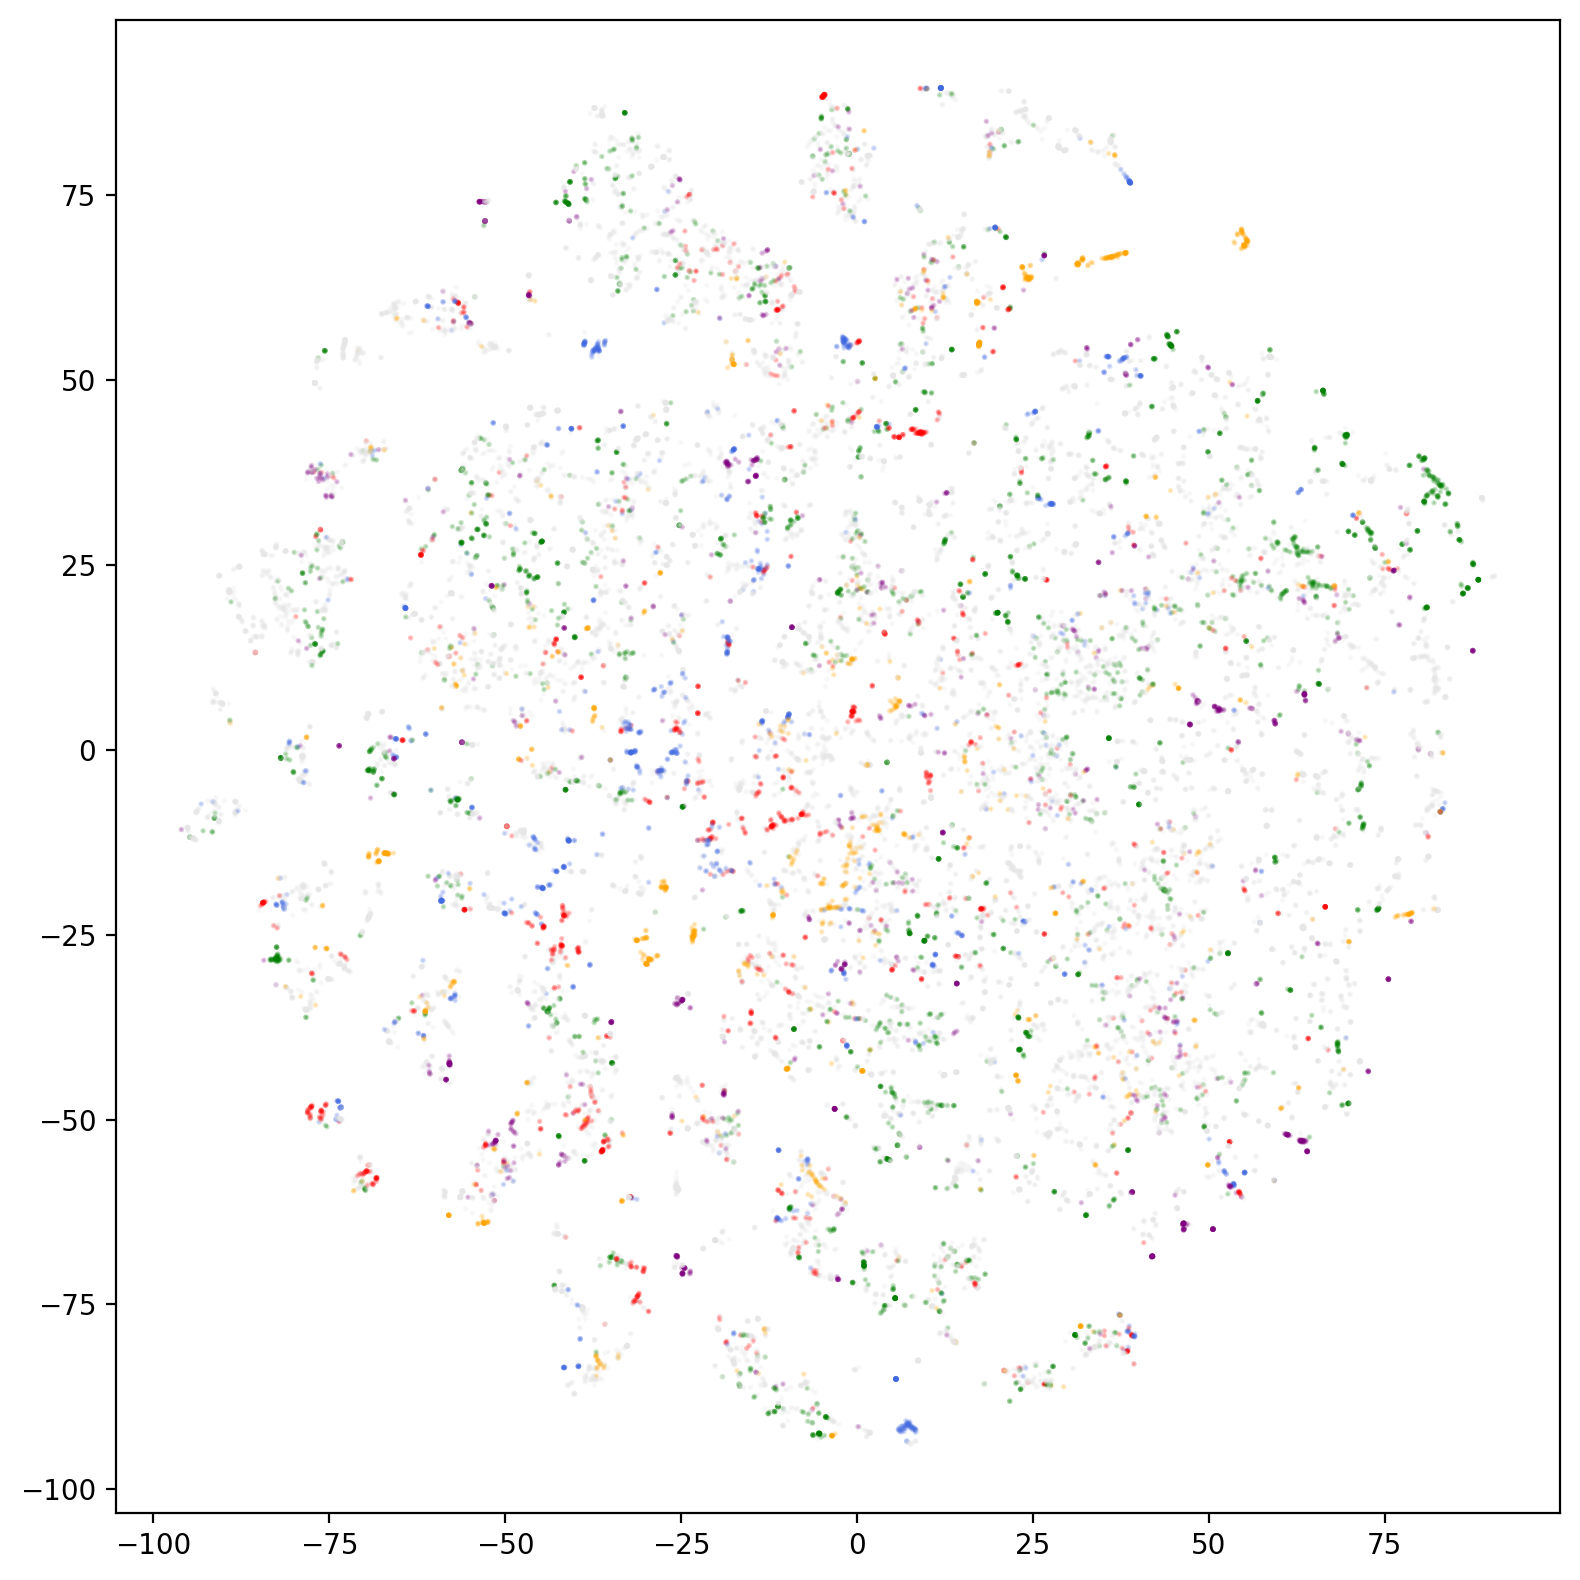

In [8]:
tsne = TSNE(n_components=2)
x_embedded = tsne.fit_transform(polar_dfs.to_numpy())
x_embedded

x, y = zip(*x_embedded)

fig, ax = plt.subplots(figsize=(8, 8), dpi=200, tight_layout=True)
ax.scatter(x=x, y=y, c=colors, alpha=.2, s=1.0)
plt.show()

In [9]:
df = pd.read_csv('./resources/extinction/dlc/60min_x1_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])
print(len(df))
a = df[(100 < df['X']) & (df['X'] < 110)]
a

7201


X    Y  AREA  XOR  FZ  conseq FZ  Distance
Slice                                              
63     103  137  1315  445   0          0       0.9
81     106  114  1536  580   0          0       1.5
82     106  112  1531  141   0          0       0.2
162    103   97  1518  352   0          0       0.3
181    106  123  1429  703   0          0       2.1
...    ...  ...   ...  ...  ..        ...       ...
7017   105  121  1332    0   1          1       0.0
7018   104  122  1361   13   1          2       0.1
7019   104  125  1491   55   0          0       0.4
7020   105  121  1351   54   0          0       0.5
7021   102  106  1224  697   0          0       1.9

[227 rows x 7 columns]

In [10]:
#intervals = ['1h', '6h']
#count = 4
#
#fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 4), dpi=200, tight_layout=True, sharey=True, sharex=True)
#
#for interval_index, interval in enumerate(intervals):
#    for number in range(1, 9, 2):
#        ax = axes[interval_index][int((number - 1) / 2)]
#        filepath_1 = './resources/extinction/dlc/30min_x2_%s_EXT_%d.csv' % (interval, number)
#        filepath_2 = './resources/extinction/dlc/30min_x2_%s_EXT_%d.csv' % (interval, number + 1)
#        
#        df_1 = pd.read_csv(filepath_1, header=[1, 2], index_col=[0])
#        df_2 = pd.read_csv(filepath_2, header=[1, 2], index_col=[0])
#        
#        df = pd.concat([df_1, df_2])
#        
#        bodyparts = list(set([body for (body, value) in df.columns]))
#        drop_columns = [(body, 'likelihood') for body in bodyparts]
#        df.drop(drop_columns, axis=1, inplace=True)
#        
#        neck_df = df.loc[:, [('neck', 'x'), ('neck', 'y')]]
#        x_index = [number for number in range(0, len(df.columns), 2)]
#        y_index = [number for number in range(1, len(df.columns), 2)]
#        for index, (key, series) in enumerate(df.iteritems()):
#            if index % 2 == 0:
#                series -= neck_df.iloc[:, 0]
#            else:
#                series -= neck_df.iloc[:, 1]
#                
#            df.iloc[:, index] = series
#    
#        tsne = TSNE(n_components=2)
#        x_embedded = tsne.fit_transform(df.to_numpy())
#        
#        xy_1 = pd.read_csv('./resources/extinction/dlc/30min_x2_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])
#        xy_2 = pd.read_csv('./resources/extinction/dlc/30min_x2_%s_EXT_%d_XY.tsv' % (interval, number + 1), sep="\t", header=[34], index_col=[0])
#        
#        x, y = zip(*x_embedded)
#        size = len(df)
#        # freezing_size = int(size / 3 * 2 + 1)
#        # sleeping_size = int(size / 3)
#        
#        freezing_size = len(df_1)
#        sleeping_size = len(df_2)
#        colors = ['royalblue'] * freezing_size + ['firebrick'] * sleeping_size
#        for index, fz in enumerate(xy_1['FZ']):
#            if fz == 0:
#                continue
#            
#            colors[index] = 'green'
#            
#        for index, fz in enumerate(xy_2['FZ']):
#            if fz == 0:
#                continue
#                
#            colors[index] = 'orange'
#        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.2)
#        if number == 1:
#            ax.set_ylabel(interval)
#        if interval == '6h':
#            ax.set_xlabel('#%d' % int((number + 1) / 2))
#plt.show()

In [11]:
#intervals = ['1h', '6h']
#count = 4
#
#fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 4), dpi=200, tight_layout=True, sharey=True, sharex=True)
#
#for interval_index, interval in enumerate(intervals):
#    for number in range(1, 9, 2):
#        ax = axes[interval_index][int((number - 1) / 2)]
#        filepath_1 = './resources/extinction/dlc/30min_x2_%s_EXT_%d.csv' % (interval, number)
#        filepath_2 = './resources/extinction/dlc/30min_x2_%s_EXT_%d.csv' % (interval, number + 1)
#        
#        df_1 = pd.read_csv(filepath_1, header=[1, 2], index_col=[0])
#        df_2 = pd.read_csv(filepath_2, header=[1, 2], index_col=[0])
#            
#        xy_1 = pd.read_csv('./resources/extinction/dlc/30min_x2_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])
#        freezing_index_1 = xy_1[xy_1['FZ'] == 1].index
#        freezing_df_1 = df_1.iloc[freezing_index_1, :]
#        
#        xy_2 = pd.read_csv('./resources/extinction/dlc/30min_x2_%s_EXT_%d_XY.tsv' % (interval, number + 1), sep="\t", header=[34], index_col=[0])
#        freezing_index_2 = xy_2[xy_2['FZ'] == 1].index
#        freezing_df_2 = df_2.iloc[freezing_index_2, :]
#        
#        freezing_df = pd.concat([freezing_df_1, freezing_df_2])
#        
#        bodyparts = list(set([body for (body, value) in freezing_df.columns]))
#        drop_columns = [(body, 'likelihood') for body in bodyparts]
#        freezing_df.drop(drop_columns, axis=1, inplace=True)
#        
#        neck_df = freezing_df.loc[:, [('neck', 'x'), ('neck', 'y')]]
#        x_index = [freezing_number for freezing_number in range(0, len(freezing_df.columns), 2)]
#        y_index = [freezing_number for freezing_number in range(1, len(freezing_df.columns), 2)]
#        for index, (key, series) in enumerate(freezing_df.iteritems()):
#            if index % 2 == 0:
#                series -= neck_df.iloc[:, 0]
#            else:
#                series -= neck_df.iloc[:, 1]
#                
#            freezing_df.iloc[:, index] = series
#        
#        tsne = TSNE(n_components=2)
#        x_embedded = tsne.fit_transform(freezing_df.to_numpy())
#        x_embedded
#        
#        x, y = zip(*x_embedded)
#        
#        freezing_size = len(freezing_df_1)
#        sleeping_size = len(freezing_df_2)
#        colors = ['green'] * freezing_size + ['orange'] * sleeping_size
#        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.2)
#        
#        if number == 1:
#            ax.set_ylabel(interval)
#        if interval == '6h':
#            ax.set_xlabel('#%d' % int((number + 1) / 2))
#plt.show()